In [1]:
!pip install pydicom
!pip install pylab

     ---------------------------------------- 2.0/2.0 MB 12.7 kB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


上面是安装相关包
下面开始处理图片

In [2]:
import pydicom
import pylab


设定数据路径

In [6]:
file_path = r"C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay"
maximg = 20
minimg = 4
# 第一条数据
firstfile = str(minimg) + ".dcm"
firstfile = file_path + "\\" + firstfile

In [7]:
print(firstfile)

C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\4.dcm


读取数据

In [8]:
firstdata = pydicom.read_file(firstfile)

In [10]:
firstdata.dir("pat")

['AdditionalPatientHistory',
 'ConfidentialityConstraintOnPatientDataDescription',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'IssuerOfPatientID',
 'Occupation',
 'OtherPatientIDs',
 'OtherPatientNames',
 'PatientAddress',
 'PatientAge',
 'PatientBirthDate',
 'PatientBirthName',
 'PatientBirthTime',
 'PatientComments',
 'PatientID',
 'PatientMotherBirthName',
 'PatientName',
 'PatientOrientation',
 'PatientPosition',
 'PatientReligiousPreference',
 'PatientSex',
 'PatientSize',
 'PatientState',
 'PatientTelephoneNumbers',
 'PatientWeight',
 'ReferencedPatientSequence']

In [11]:
firstdata.PatientName

'CAI JIN'

In [12]:
pix = firstdata.pixel_array

In [14]:
pix.size

378880

In [15]:
pix.shape

(592, 640)

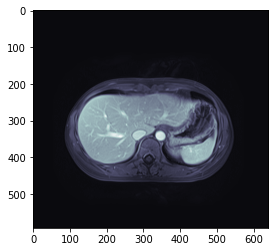

In [16]:
pylab.imshow(pix,cmap=pylab.cm.bone)

In [19]:
import torch

In [26]:
pix = torch.from_numpy(pix)

TypeError: expected np.ndarray (got Tensor)

In [27]:
pix.size()

torch.Size([592, 640])

In [39]:
pix = pix.unsqueeze(0)

In [40]:
pix.size()

torch.Size([1, 592, 640])

In [41]:
ppp = torch.cat((pix, pix), 0)
ppp.size()

torch.Size([2, 592, 640])

下面是保存图片数据

In [48]:
file_path = r"C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay"
save_path = r"C:\Users\54469\Desktop\yjs\data\save"
save_name = "savedata.pth"
firstImg = True
bigData = None
for i in range(minimg,maximg):
    file = str(i) + ".dcm"
    file = file_path + "\\" + file
    print(file)
    data = pydicom.read_file(file)
    data = torch.from_numpy(data.pixel_array)
    data = data.unsqueeze(0)
    if firstImg:
        firstImg = False
        bigData = data
    else:
        bigData = torch.cat((bigData, data), 0)
print(bigData.size())
torch.save(bigData,save_path + "\\" + save_name)

C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\4.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\5.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\6.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\7.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\8.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\9.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\10.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\11.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\12.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\13.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\14.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\15.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\16.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\17.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\18.dcm
C:\Users\54469\Desktop\yjs\data\2\toshiba\CAI JIN\delay\19.dc

读取图片数据

In [50]:
a = torch.load(save_path + "\\" + save_name)
print(a.size())

torch.Size([16, 592, 640])


In [ ]:
# 只要x_train和y_train的第一个维度对的上，就可以读入DataLoader
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)